For $c=1$ we get the eigenvalues:

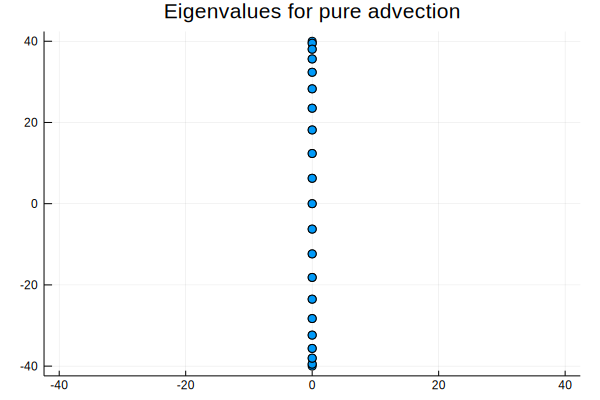

In [1]:
include("../FNC.jl")
x,Dx = FNC.diffper(40,[0,1])

using LinearAlgebra
lambda = eigvals(Dx);

using Plots
scatter(real(lambda),imag(lambda),xlim=[-40,40],ylim=[-40,40],
    title="Eigenvalues for pure advection",leg=:none)     

Let's choose a time step of $\tau=0.1$ and compare to the stability regions of the Euler and backward Euler time steppers.

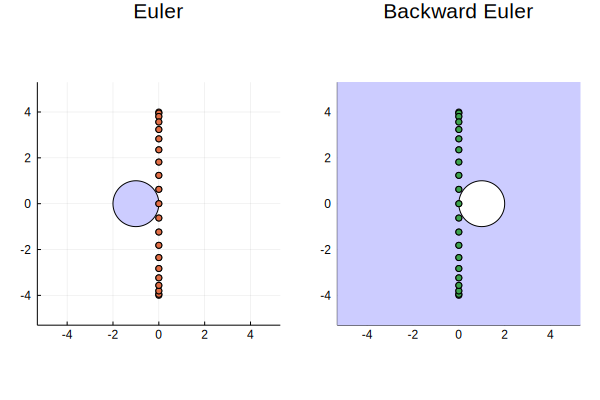

In [2]:
zc = @.exp(1im*2pi*(0:360)/360);    # points on |z|=1

z = zc .- 1;                        # shift left by 1
plot(Shape(real(z),imag(z)),color=RGB(.8,.8,1),layout=(1,2),subplot=1)
scatter!(real(0.1*lambda),imag(0.1*lambda),m=3,subplot=1,
    xlim=[-5,5],ylim=[-5,5],aspect_ratio=1,title="Euler",leg=:none)

z = zc .+ 1;                        # shift right by 1
plot!(Shape([-6,6,6,-6],[-6,-6,6,6]),color=RGB(.8,.8,1),subplot=2)
plot!(Shape(real(z),imag(z)),color=:white,subplot=2)
scatter!(real(0.1*lambda),imag(0.1*lambda),m=3,subplot=2,
    xlim=[-5,5],ylim=[-5,5],aspect_ratio=1,title="Backward Euler",leg=:none)

In the Euler case it's clear that *no* real value of $\tau>0$ is going to make all (or even any) of the $\tau\lambda_j$ fit within the stability region. Hence Euler will never produce bounded solutions to this discretization of the advection equation. The A-stable backward Euler time stepping tells the exact opposite story; it will be absolutely stable regardless of $\tau$.